# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [1]:
import numpy as np

In [ ]:
# 1. creare un vettore numpy con canoni mensili
canoni = np.array([720, 980, 650, 1200], dtype=np.float64)
print(f'Canoni mensili: {canoni}')

# 2. spesa totale mensile
tot_spesa = np.sum(canoni)
print(f'Spesa totale mensile: {tot_spesa}')

# 3. aumento del 12% su 1200
canoni[3] = canoni[3] * 1.12
print(f'Canoni mensili con aumento 12%: {canoni}')
tot_spesa_post = np.sum(canoni)

# 4. sconto del 10% su 650
canoni[2] = canoni[2]-(canoni[2] * 0.1)
print(f'Canoni mensili con sconto 10%: {canoni}')

# 5. aumento del 5% su 720 e 980
canoni[0] = canoni[0] * 1.05
canoni[1] = canoni[1] * 1.05
print(f'Canoni mensili con aumento 5%: {canoni}')

# 6. nuova spesa totale mensile
tot_spesa_new = np.sum(canoni)
print(f'Nuova spesa totale mensile: {tot_spesa_new}')

# 7. confronto spese mensili post aumento canone 1.200
print(f'\nSpesa prima degli aumenti: {tot_spesa}\nSpesa dopo aumento del 12%: {tot_spesa_post}')
diff_aumento = tot_spesa_post - tot_spesa
print(f'L\'aumento ha influito per {diff_aumento} euro')


Canoni mensili: [ 720.  980.  650. 1200.]
Spesa totale mensile: 3550.0
Canoni mensili con aumento 12%: [ 720.  980.  650. 1344.]
Canoni mensili con sconto 10%: [ 720.  980.  585. 1344.]
Canoni mensili con aumento 5%: [ 756. 1029.  585. 1344.]
Nuova spesa totale mensile: 3714.0

Spesa prima degli aumenti: 3550.0
Spesa dopo aumento del 12%: 3694.0
L'aumento ha influito per 144.0 euro


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

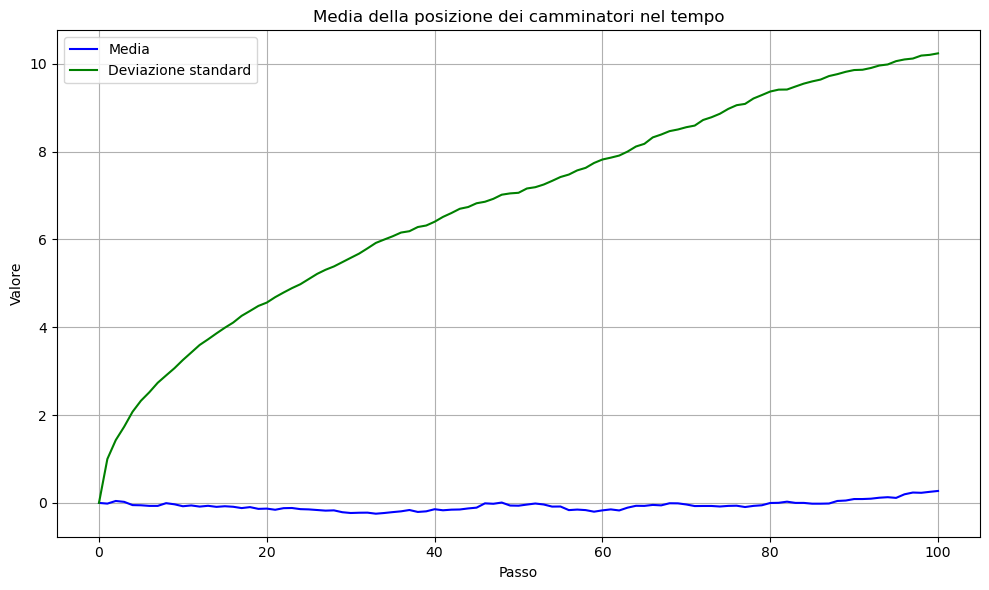

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(n_passi, N_camminatori):

    passi = np.random.choice([-1,1], size=(N_camminatori, n_passi))

    # calcola la posizione cumulativa ad ogni passo per ogni camminatore
    posizioni = np.cumsum(passi, axis=1)

    # aggiungi la posizioni iniziale x=0
    posizioni = np.hstack((np.zeros((N_camminatori, 1)), posizioni))

    # calcola la media e la dev standard ad ogni passo

    media_posizione = np.mean(posizioni, axis=0)
    dev_std_posizione = np.std(posizioni, axis=0)

    return media_posizione, dev_std_posizione

# parametri
n = 100
N = 1000

# simulazione
media, std_dev = random_walk(n, N)

# plot
plt.figure(figsize=(10,6))

plt.plot(media, color='blue', label='Media')
plt.plot(std_dev, color='green', label='Deviazione standard')

plt.title('Media della posizione dei camminatori nel tempo')
plt.xlabel('Passo')
plt.ylabel('Valore')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [37]:
np.random.seed(42)

# genero array 5x9 con numeri da una gaussiana
a = np.random.normal(loc=0, scale=1, size=(5,9))
print(f'Array generato: \n{a}')

# trovo il valore più vicino a 0.1 in ogni riga
closest = np.array([row[np.argmin(np.abs(row-0.1))] for row in a])
print(f'\nValori più vicini a 0.1 per ogni riga: \n{closest}')

Array generato: 
[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783
  -0.56228753 -1.01283112  0.31424733]
 [-0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358]
 [ 0.37569802 -0.60063869 -0.29169375 -0.60170661  1.85227818 -0.01349722
  -1.05771093  0.82254491 -1.22084365]
 [ 0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199]]

Valori più vicini a 0.1 per ogni riga: 
[-0.1382643   0.24196227  0.11092259 -0.01349722  0.17136828]


## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Primi 10 passeggeri: 
     PassengerId      Fare                                             Name
679          680  512.3292               Cardeza, Mr. Thomas Drake Martinez
737          738  512.3292                           Lesurer, Mr. Gustave J
258          259  512.3292                                 Ward, Miss. Anna
341          342  263.0000                   Fortune, Miss. Alice Elizabeth
438          439  263.0000                                Fortune, Mr. Mark
88            89  263.0000                       Fortune, Miss. Mabel Helen
27            28  263.0000                   Fortune, Mr. Charles Alexander
311          312  262.3750                       Ryerson, Miss. Emily Borie
742          743  262.3750            Ryerson, Miss. Susan Parker "Suzette"
299          300  247.5208  Baxter, Mrs. James (Helene DeLaudeniere Chaput)

Media di age: 29.699
Media di Fare: 32.756
Media di SibSp: 0.523

Passeggero con family_index massimo: 
Name            Andersson, Miss. Erna

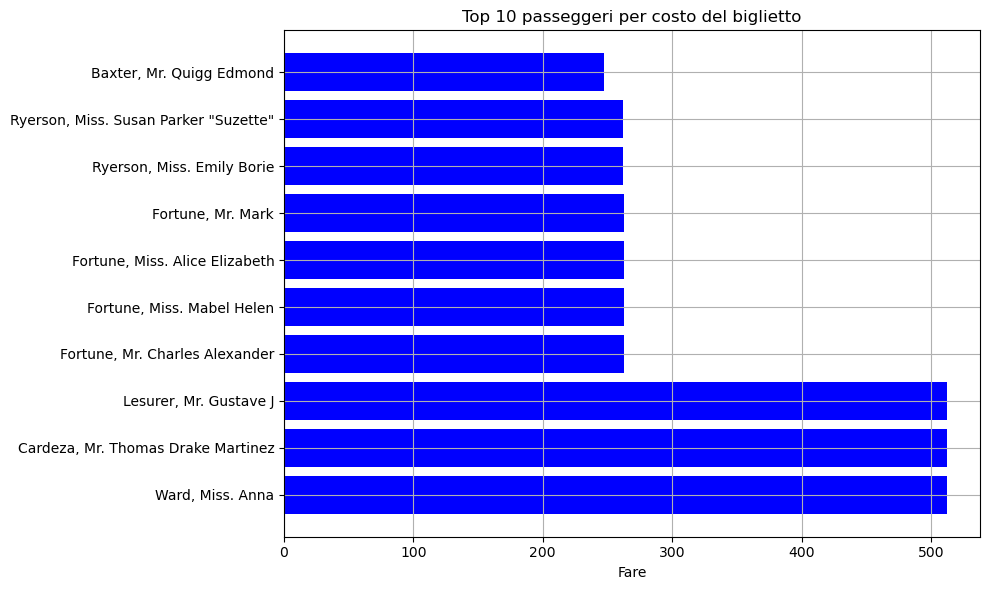

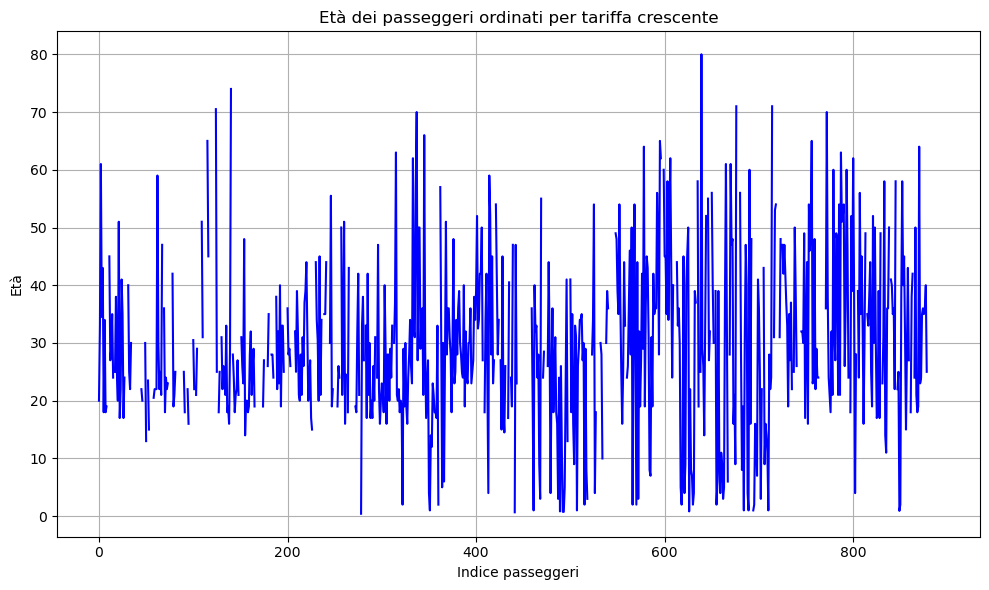

In [57]:
# 1. visualizzare i primi 10 paseggeri ordinati per tariffa pagata dal più alto al più basso
first_10 = df.sort_values(by='Fare', ascending=False).head(10)
print(f'Primi 10 passeggeri: \n{first_10[['PassengerId', 'Fare', 'Name']]}')

# 2. calcola la media di Fare, Age, sibsip
mean_age = df['Age'].mean()
mean_fare = df['Fare'].mean()
mean_sibsp = df['SibSp'].mean()
print(f'\nMedia di age: {mean_age:.3f}\nMedia di Fare: {mean_fare:.3f}\nMedia di SibSp: {mean_sibsp:.3f}')

# 3. nuova colonna family_index
df['Fare'] = df['Fare'].replace(0, np.nan)
df['Family_index'] = (df['SibSp']+df['Parch'])/df['Fare']

# 4. passeggero con valore massimo di family_index
max_pax = df.loc[df['Family_index'].idxmax()]
print('\nPasseggero con family_index massimo: ')
print(max_pax[['Name', 'Family_index']])

# 5. filtra solo i passeggeri che hanno Fare>100
Fare_100 = df[df['Fare']>100]
print(f'\nPasseggeri che hanno Fare>100: \n{Fare_100[['PassengerId', 'Fare', 'Name']]}')

# 6. grafico a barre con i 10 passeggeri che hanno pagato di più
top_fares = df.nlargest(10, 'Fare')

plt.figure(figsize=(10,6))
plt.barh(top_fares['Name'], top_fares['Fare'], color='blue')
plt.xlabel('Fare')
plt.title('Top 10 passeggeri per costo del biglietto')
plt.tight_layout()
plt.grid(True)
plt.show()

# 7. grafico a linee di age ordinando i passeggeri per tariffa crescente
df_sorted = df.sort_values(by='Fare')

plt.figure(figsize=(10,6))
plt.plot(df_sorted['Age'].reset_index(drop=True), color='blue')
plt.title('Età dei passeggeri ordinati per tariffa crescente')
plt.xlabel('Indice passeggeri')
plt.ylabel('Età')
plt.grid(True)
plt.tight_layout()
plt.show()



## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


Righe: 344
Colonne: 7

Valori mancanti per colonna:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Righe duplicate: 0

Massa corporea media per ogni specie: 
species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


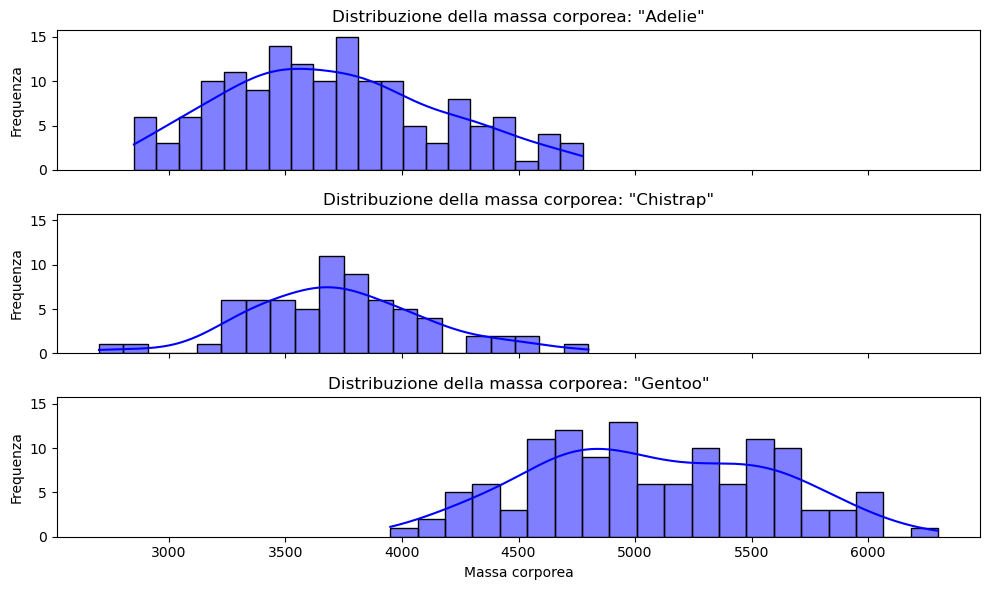

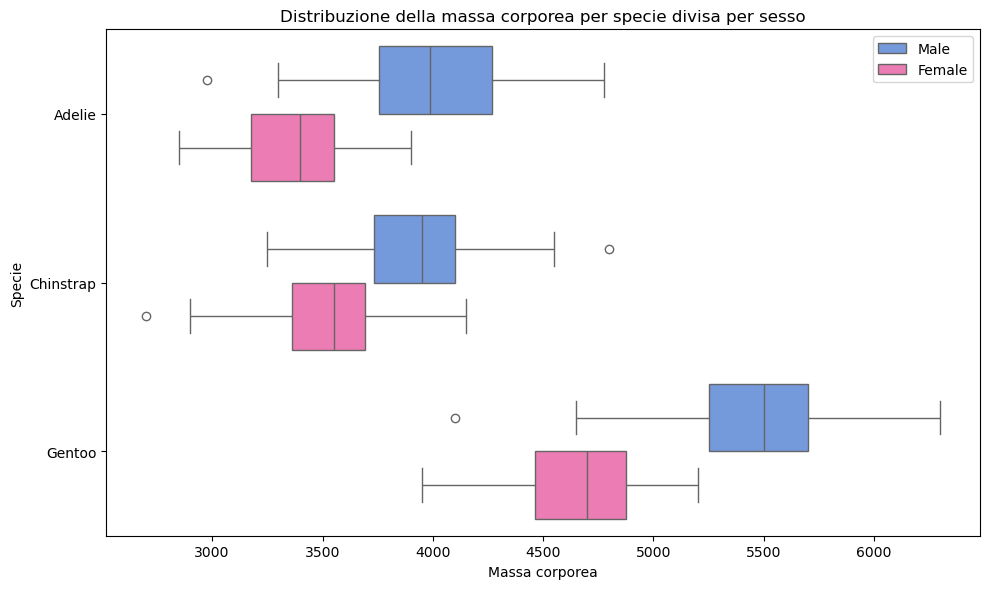

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

pe_df = sns.load_dataset('penguins')

# 1. righe e colonne del dataset
print(f'Righe: {pe_df.shape[0]}')
print(f'Colonne: {pe_df.shape[1]}')

# 2. valori mancanti per colonna
print('\nValori mancanti per colonna:')
print(pe_df.isna().sum())

# 3. riempire i valori mancanti nella colonna sex con il più frequente
sex_moda = pe_df['sex'].mode()[0]
pe_df['sex'] = pe_df['sex'].fillna(sex_moda)

# 4. rimuovere le righe con valori mancanti in boy_mass_g
pe_df = pe_df.dropna(subset=['body_mass_g'])

# 5. righe duplicate
print(f'\nRighe duplicate: {pe_df.duplicated().sum()}')

# 6. massa corporea media per ogni specie
mean_mass = pe_df.groupby('species')['body_mass_g'].mean()
print(f'\nMassa corporea media per ogni specie: \n{mean_mass}')

# 7. distribuzione della massa corporea per specie
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,6), sharex=True, sharey=True)

sns.histplot(data=pe_df[pe_df['species']=='Adelie'], x='body_mass_g', ax=ax1, bins=20, kde=True, color='blue')
ax1.set_title('Distribuzione della massa corporea: "Adelie"')

sns.histplot(data=pe_df[pe_df['species']=='Chinstrap'], x='body_mass_g', ax=ax2, bins=20, kde=True, color='blue')
ax2.set_title('Distribuzione della massa corporea: "Chistrap"')

sns.histplot(data=pe_df[pe_df['species']=='Gentoo'], x='body_mass_g', ax=ax3, bins=20, kde=True, color='blue')
ax3.set_title('Distribuzione della massa corporea: "Gentoo"')

ax3.set_xlabel('Massa corporea')
ax1.set_ylabel('Frequenza')
ax2.set_ylabel('Frequenza')
ax3.set_ylabel('Frequenza')
plt.tight_layout()
plt.show()

# 8. distribuzione della massa corporea per specie dividendo per sesso
plt.figure(figsize=(10,6))
sns.boxplot(data=pe_df, x='body_mass_g', y='species', hue='sex', palette=[ "#6495ED","#FF69B4"])
plt.title('Distribuzione della massa corporea per specie divisa per sesso')
plt.legend()
plt.tight_layout()
plt.xlabel('Massa corporea')
plt.ylabel('Specie')
plt.show()


## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.
